In [20]:
from scipy.signal import chirp, spectrogram, welch
import numpy as np
import matplotlib.pyplot as plt



In [21]:
fs = 500

t0 = 0
t1 = 1000

t = np.linspace(t0,t1,t1*fs)

f0 = 1/5
f1 = 1/25



In [22]:
y = chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)

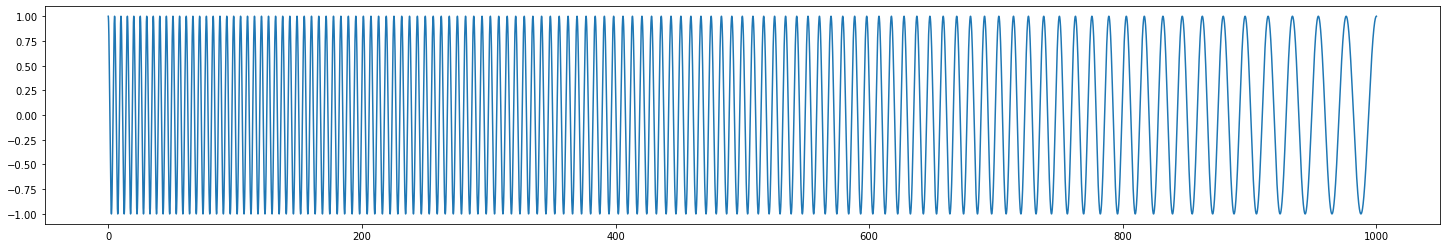

In [23]:
plt.figure(figsize=(25,4))
plt.plot(t,y)
plt.show()

25000
25000


(0.0, 0.3)

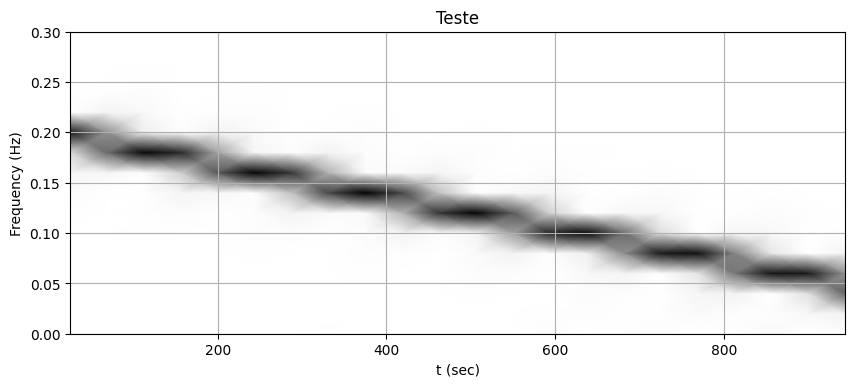

In [24]:
def plot_spectrogram(title, w, fs):
    NPERSEG = int((len(w)/20))
    print(NPERSEG)
    NFFT = int(len(w)/20)
    print(NFFT)
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=NPERSEG, noverlap=NPERSEG/8, nfft=NFFT)
    # ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=1000*1,nfft=4096*2)
    # ff, tt, Sxx = spectrogram(w, fs=fs)
    # plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='jet', shading='gouraud')
    plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
    plt.pcolormesh(tt, ff, Sxx, cmap='gray_r', shading='gouraud')
    # plt.pcolormesh(tt, ff, Sxx)
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()
    return ff, tt, Sxx

ff, tt, Sxx = plot_spectrogram('Teste',y,fs=fs)
plt.ylim(0,.3)

In [25]:
a = len(y)/1000

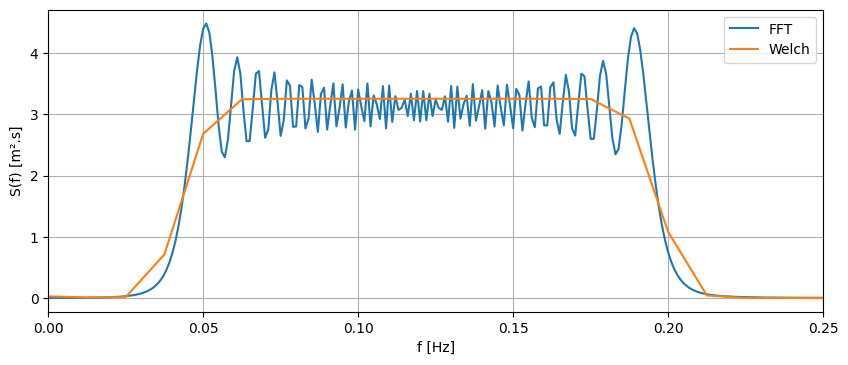

In [26]:
from scipy.fft import fft

yf = fft(y)
N1 = len(yf)

# vetor de frequencias
Delta_f = 1/(t1-t0)
fv = np.arange(N1) * Delta_f

# remoção do aliasing
yf = 2*yf[0:N1//2]
wv = 2*np.pi*fv[0:N1//2]

# Cálculo na frequencia angular
Delta_w = 2*np.pi*Delta_f
zeta_a1 = np.abs(yf)/N1
Sw1 = (zeta_a1**2)/(2*Delta_w)

f, Pxx_den = welch(y, fs, nperseg=40000)

#plot dos espectros
plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(wv/(2*np.pi), Sw1*(2*np.pi))
plt.plot(f,Pxx_den)
plt.ylabel('S(f) [m².s]')
plt.xlabel('f [Hz]')
plt.xlim((0,0.25))
plt.legend(('FFT','Welch'))
plt.grid()
plt.show()


In [27]:
m0_fft = np.trapz(Sw1*(2*np.pi), wv/(2*np.pi))
print(m0_fft)
m0_welch = np.trapz(Pxx_den, f)
print(m0_welch)

0.5000088448868386
0.500287143239943
